In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Read datasets
df_cost_city = pd.read_excel("CityCostOfLivingIndex.xlsx")
df_cost_city = df_cost_city.dropna(axis = 0)
df_cost_city = df_cost_city[["City", "Cost of Living Index"]]
data_cost_city = []

for value in df_cost_city.values.tolist():
    city = value[0].split(", ")[0]
    country = value[0].split(", ")[-1]
    data_cost_city.append([city,country,value[1]])

df_cost_country = pd.read_excel("CountryCostOfLiving.xlsx")
df_cost_country = df_cost_country.dropna(axis=0)
df_cost_country = df_cost_country[["Country", "Cost of Living Index"]]
data_cost_country = df_cost_country.values.tolist()

df_population = pd.read_excel("CityPopulation.xlsx")
df_population = df_population.dropna(axis = 0)
df_population = df_population[["city_ascii", "country","population"]]
data_population = df_population.values.tolist()

In [6]:
#Combine dataframes from different sources
class Datapoint:
    def __init__ (self, info):
        self.city = info[0]
        self.country = info[1]
        self.city_cost = info[2]
        self.country_cost = -1
        self.population = -1

    def findCountry (self, countryList):
        for country in countryList:
            if country[0] == self.country:
                self.country_cost = country[1]
    
    def findPopulation (self, populationList):
        for city in populationList:
            if city[0] == self.city and city[1] == self.country:
                self.population = city[2]

    def giveInfo (self):
        return [self.city, self.country, self.population, self.city_cost, self.country_cost]

    def checkAppropriate(self):
        return not -1 in self.giveInfo()

all_data = []

for value in data_cost_city:
    newDatapoint = Datapoint(value)
    newDatapoint.findCountry(data_cost_country)
    newDatapoint.findPopulation(data_population)
    if newDatapoint.checkAppropriate():
        all_data.append(newDatapoint.giveInfo())

df = pd.DataFrame(all_data, columns=["City", "Country", "City Population", "City Cost of Living", "Country Cost of Living"])
df.to_csv('CostOfLivingData.csv')

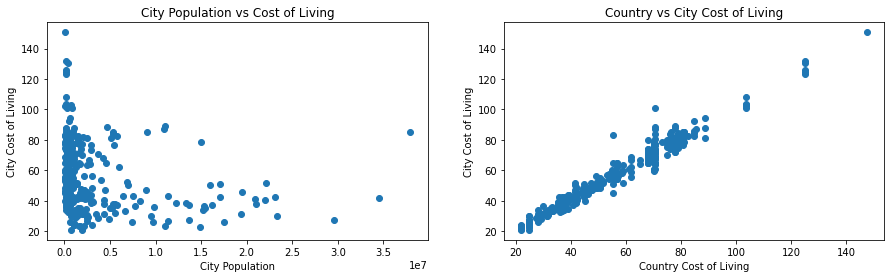

In [7]:
#Visualize data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
axes[0].scatter(df["City Population"],df["City Cost of Living"])
axes[0].set_xlabel("City Population")
axes[0].set_ylabel("City Cost of Living")
axes[0].set_title("City Population vs Cost of Living")

axes[1].scatter(df["Country Cost of Living"],df["City Cost of Living"])
axes[1].set_xlabel("Country Cost of Living")
axes[1].set_ylabel("City Cost of Living")
axes[1].set_title("Country vs City Cost of Living")

plt.show()